In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml

In [47]:
covid_cases = pd.read_csv('data/raw/conposcovidloc.csv')

In [48]:
income_canada = pd.read_csv('data/raw/income.csv')

/var/folders/km/vjt389x91b93k1_jy0g3jscc0000gn/T/ipykernel_57639/983498087.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  income_canada = pd.read_csv('data/raw/income.csv')


In [49]:
data = {
    'income.csv.dvc': {
        'obtained': '2023-10-18',
        'source': 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1110003101&pickMembers%5B0%5D=1.82&cubeTimeFrame.startYear=2019&cubeTimeFrame.endYear=2021&referencePeriods=20190101%2C20210101',
        'description': 'Labour income profile of tax filers by sex'
    },
    
    'conposcovidloc.csv.dvc': {
        'obtained': '2023-10-18',
        'source': 'https://open.canada.ca/data/en/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/2772b3db-9f1c-4669-87f8-8fcab4db6e46',
        'description': 'Confirmed positive cases of COVID-19 in Ontario - Data Dictionary'
    },
    'population.csv.dvc': {
        'obtained': '2023-10-19',
        'source': 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=9810001101',
        'description': 'Population and dwelling counts: Canada and population centres'
    },
    'health_ineq_online_table_1.csv.dvc': {
        'obtained': '2023-10-13',
        'source': 'https://healthinequality.org/data/',
        'description': 'Chetty et al (JAMA 2016) Online Data Tables'
    },
    'health_ineq_online_table_2.csv.dvc': {
        'obtained': '2023-10-13',
        'source': 'https://healthinequality.org/data/',
        'description': 'Chetty et al (JAMA 2016) Online Data Tables'
    }
}

# Define the file path where you want to save the YAML file
yaml_file_path = 'data/raw/source.yaml'

# Write the data to a YAML file
with open(yaml_file_path, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print(f'YAML data has been saved to {yaml_file_path}')

YAML data has been saved to data/raw/source.yaml


In [50]:
covid_cases['count'] = 1

In [51]:
covid_cases.head(3)

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome1,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude,count
0,1,1934-09-28,2022-09-29,2022-09-29,2022-09-27,<20,FEMALE,NaN,2262,Thunder Bay District Health Unit,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851,1
1,2,1989-02-21,2022-11-08,2022-11-07,2022-11-06,<20,FEMALE,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239,1
2,3,2000-03-01,2022-01-30,NaN,2000-03-01,<20,FEMALE,NaN,2243,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833,1


In [52]:
income_canada.head(3)

,REF_DATE,GEO,DGUID,Sex,Labour income profile,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2000,Canada,2016A11124,Both sexes,Number of tax filers with total income,Number,223,units,0,v29845667,1.1.1,22131680.0,NaN,NaN,NaN,0
1,2000,Canada,2016A11124,Both sexes,Total income of tax filers with total income,Dollars,81,thousands,3,v29845668,1.1.2,675921102.0,NaN,NaN,NaN,0
2,2000,Canada,2016A11124,Both sexes,Median total income of tax filers with total i...,Dollars,81,units,0,v29845669,1.1.3,21600.0,NaN,NaN,NaN,0


In [53]:
#add year to covid data
covid_cases['Case_Reported_Date'] = pd.to_datetime(covid_cases['Case_Reported_Date'])
covid_cases['case_report_year'] = covid_cases['Case_Reported_Date'].dt.year

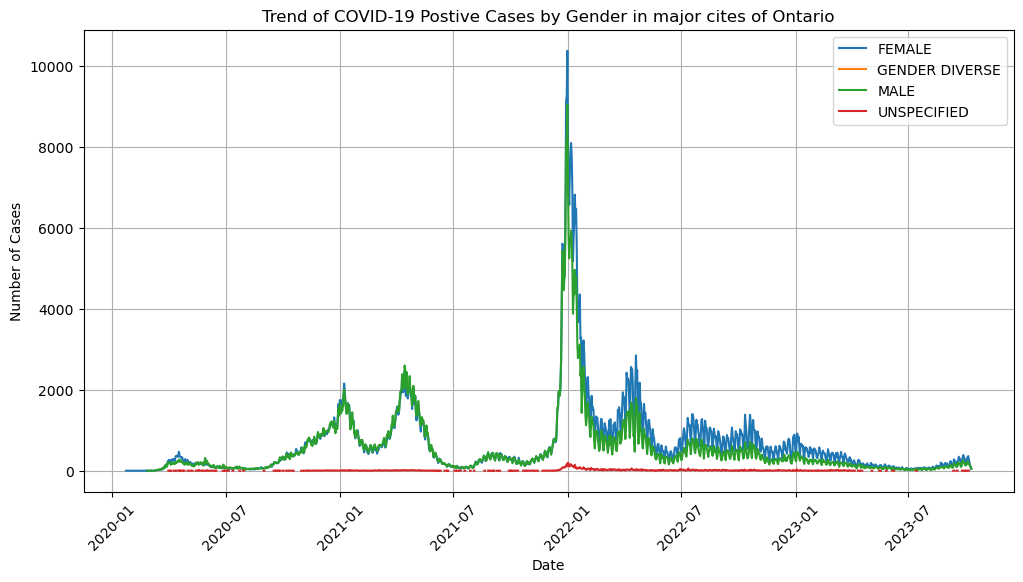

In [54]:
covid_cases['Case_Reported_Date'] = pd.to_datetime(covid_cases['Case_Reported_Date'])

# Group data by 'Sex' and 'Case_Reported_Date' and count the number of cases for each day
gender_grouped = covid_cases.groupby(['Case_Reported_Date', 'Client_Gender'])['Client_Gender'].count().unstack()

# Plot the trend for each 'Client_Gender' category
plt.figure(figsize=(12, 6))
for gender in gender_grouped.columns:
    plt.plot(gender_grouped.index, gender_grouped[gender], label=gender)

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Trend of COVID-19 Postive Cases by Gender in major cites of Ontario')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

png_filename = "results/Trend of COVID-19 Postive Cases by Gender in major cites of Ontario.png"

# Save the plot as a PNG file
plt.savefig(png_filename)

plt.show()


In [55]:
set(covid_cases['case_report_year'])

{2020, 2021, 2022, 2023}

In [56]:
grouped_data = covid_cases.groupby(['case_report_year', 'Client_Gender', 'Reporting_PHU_City']).size().reset_index(name='Count')

# Pivot the data to have male and female counts as separate columns
pivoted_data = grouped_data.pivot(index=['case_report_year', 'Reporting_PHU_City'], columns='Client_Gender', values='Count').reset_index()

# Calculate the difference between male and female counts
pivoted_data['Difference'] = pivoted_data['MALE'] - pivoted_data['FEMALE']

# Display the resulting DataFrame with the difference column
pivoted_data.head(3)

Client_Gender,case_report_year,Reporting_PHU_City,FEMALE,GENDER DIVERSE,MALE,UNSPECIFIED,Difference
0,2020,Barrie,1803.0,NaN,1886.0,NaN,83.0
1,2020,Belleville,136.0,NaN,155.0,1.0,19.0
2,2020,Brantford,532.0,NaN,480.0,1.0,-52.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


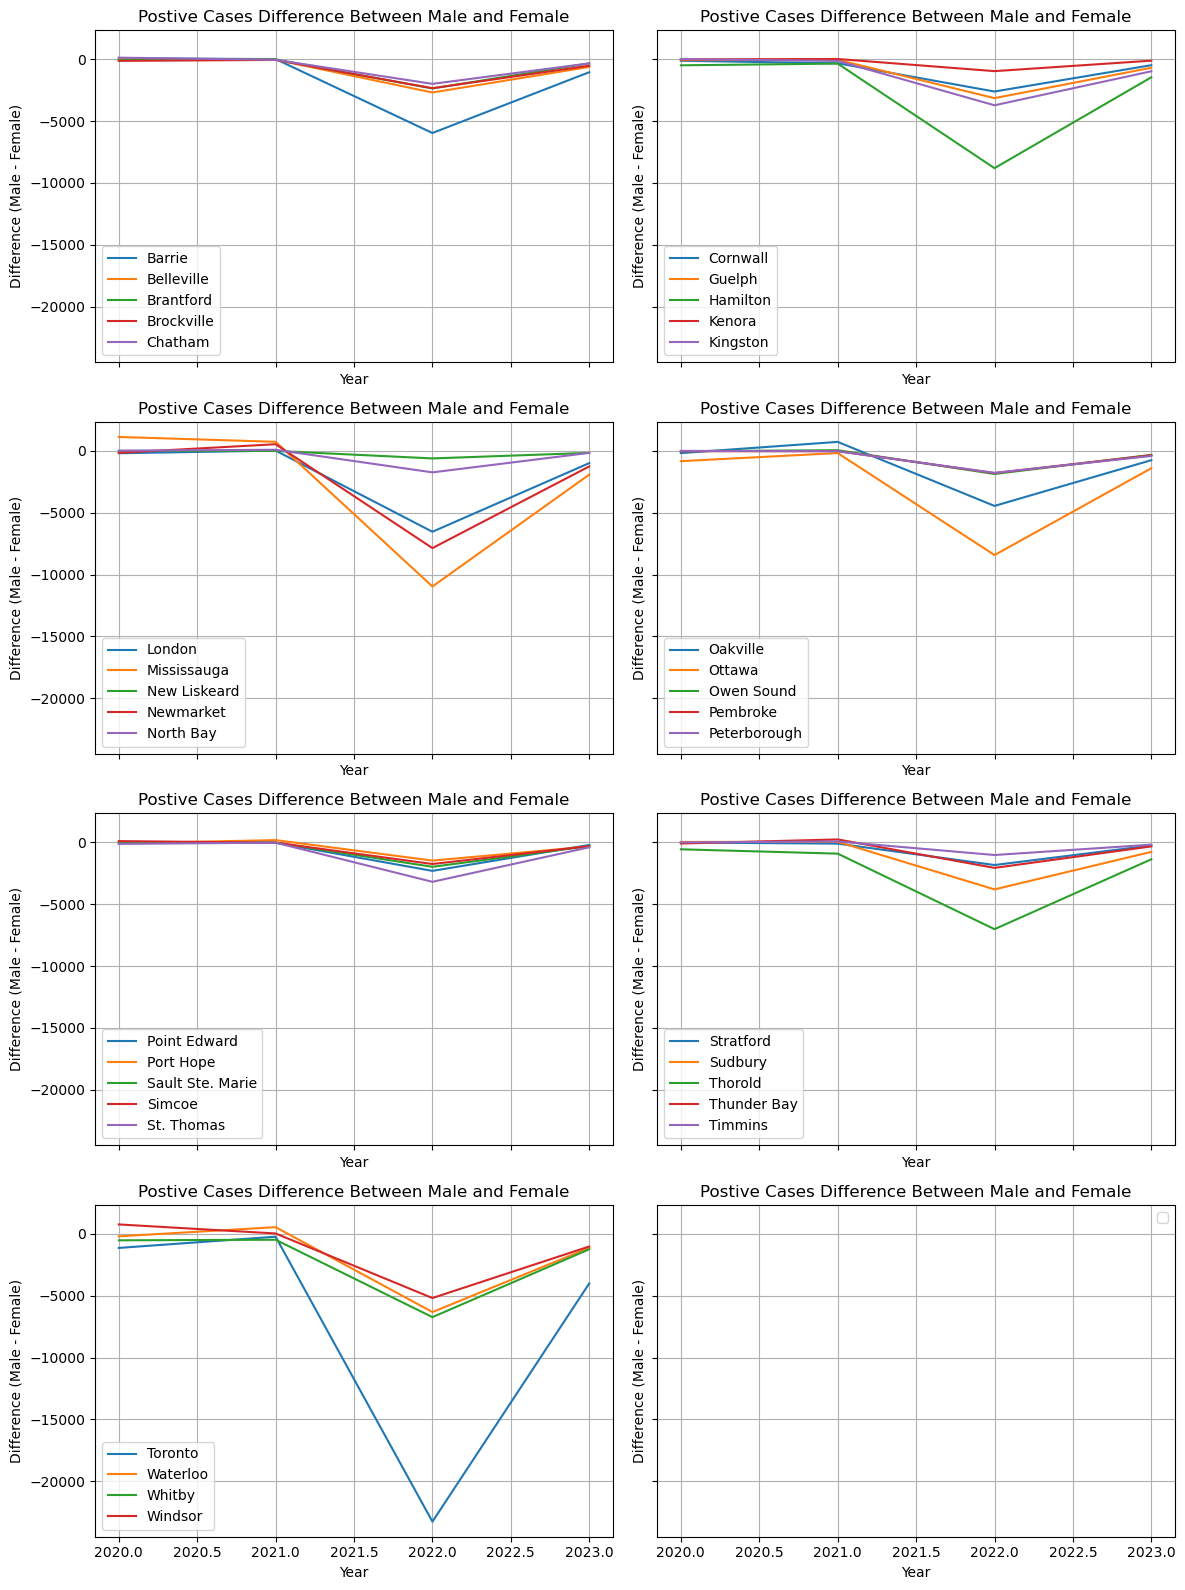

In [57]:
city_trends = pivoted_data.groupby('Reporting_PHU_City')['Difference'].mean()

# Create subplots arranged in a 4x2 grid
num_subplots = 8
cities_per_subplot = 5

# Calculate the number of cities
num_cities = len(city_trends)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16), sharex=True, sharey=True)

# Iterate over subplots and assign cities to each subplot
for i in range(4):
    for j in range(2):
        subplot_idx = i * 2 + j
        if subplot_idx < num_subplots:
            start_city_idx = subplot_idx * cities_per_subplot
            end_city_idx = (subplot_idx + 1) * cities_per_subplot
            cities_subset = list(city_trends.keys())[start_city_idx:end_city_idx]

            for city in cities_subset:
                data = pivoted_data[pivoted_data['Reporting_PHU_City'] == city]
                axes[i, j].plot(data['case_report_year'], data['Difference'], label=city)

            axes[i, j].set_xlabel('Year')
            axes[i, j].set_ylabel('Difference (Male - Female)')
            axes[i, j].set_title('Postive Cases Difference Between Male and Female')
            axes[i, j].grid(True)
            axes[i, j].legend()

# Adjust the layout
plt.tight_layout()

png_filename = "results/Postive Cases Difference Between Male and Female.png"

# Save the plot as a PNG file
plt.savefig(png_filename)

# Show the subplots
plt.show()

In [58]:
# Filter data for 2020 and 2022
data_2020 = pivoted_data[pivoted_data['case_report_year'] == 2020]
data_2022 = pivoted_data[pivoted_data['case_report_year'] == 2022]

# Calculate the differences between MALE and FEMALE in 2020 and 2022
difference_2020 = data_2020.copy()
difference_2020['Difference'] = difference_2020['MALE'] - difference_2020['FEMALE']

difference_2022 = data_2022.copy()
difference_2022['Difference'] = difference_2022['MALE'] - difference_2022['FEMALE']

# Merge the two DataFrames on 'Reporting_PHU_City'
merged_data = pd.merge(difference_2020[['Reporting_PHU_City', 'Difference']], difference_2022[['Reporting_PHU_City', 'Difference']], on='Reporting_PHU_City', suffixes=('_2020', '_2022'))

# Calculate the difference between the differences for 2022 and 2020
merged_data['Difference_2022-2020'] = merged_data['Difference_2022'] - merged_data['Difference_2020']

# Display the final DataFrame
difference_cases_df = merged_data[['Reporting_PHU_City', 'Difference_2020', 'Difference_2022', 'Difference_2022-2020']]
difference_cases_df.columns = ['City', 'Cases_Difference_2020', 'Cases_Difference_2022', 'Cases_Difference_2022-2020']

difference_cases_df.head(3)

,City,Cases_Difference_2020,Cases_Difference_2022,Cases_Difference_2022-2020
0,Barrie,83.0,-5960.0,-6043.0
1,Belleville,19.0,-2684.0,-2703.0
2,Brantford,-52.0,-2358.0,-2306.0


In [59]:
income_canada['City'] = income_canada['GEO'].str.split(',').str[0]

# Remove leading and trailing spaces if needed
income_canada['City'] = income_canada['City'].str.strip()

In [60]:
#keep only Median total income of tax filers with total income
income_canada = income_canada[income_canada['Labour income profile']=='Median total income of tax filers with total income']

In [61]:


# Filter data for 2019 and 2021
data_2019 = income_canada[(income_canada['REF_DATE'] == 2019) & (income_canada['Sex'].isin(['Males', 'Females']))]
data_2021 = income_canada[(income_canada['REF_DATE'] == 2021) & (income_canada['Sex'].isin(['Males', 'Females']))]

# Aggregate the data for 2019 and 2021 using pivot_table
pivot_2019 = pd.pivot_table(data_2019, values='VALUE', index='City', columns='Sex', aggfunc='mean')
pivot_2021 = pd.pivot_table(data_2021, values='VALUE', index='City', columns='Sex', aggfunc='mean')

# Calculate the differences between Males and Females in 2019 and 2021
difference_2019 = pivot_2019['Males'] - pivot_2019['Females']
difference_2021 = pivot_2021['Males'] - pivot_2021['Females']

# Find the difference between the differences for 2019 and 2021
final_difference = difference_2021 - difference_2019

In [62]:
difference_med_income = pd.concat([difference_2019, difference_2021, final_difference], axis=1)

# Reset the index to have 'City' as a regular column
difference_med_income.reset_index(inplace=True)

# Rename the columns to include the series names
difference_med_income.columns = ['City', 'income_difference_2019', 'income_difference_2021', 'income_final_difference_2021-2019']

# Display the DataFrame
difference_med_income.head(3)

,City,income_difference_2019,income_difference_2021,income_final_difference_2021-2019
0,Abbotsford-Mission,13800.0,13020.0,-780.0
1,Alberta,18090.0,16830.0,-1260.0
2,Alma,16840.0,15640.0,-1200.0


In [63]:
final_merged_df = difference_cases_df.merge(difference_med_income, on='City', how='left')
final_merged_df.head(3)

,City,Cases_Difference_2020,Cases_Difference_2022,Cases_Difference_2022-2020,income_difference_2019,income_difference_2021,income_final_difference_2021-2019
0,Barrie,83.0,-5960.0,-6043.0,13710.0,13370.0,-340.0
1,Belleville,19.0,-2684.0,-2703.0,NaN,NaN,NaN
2,Brantford,-52.0,-2358.0,-2306.0,10850.0,9770.0,-1080.0


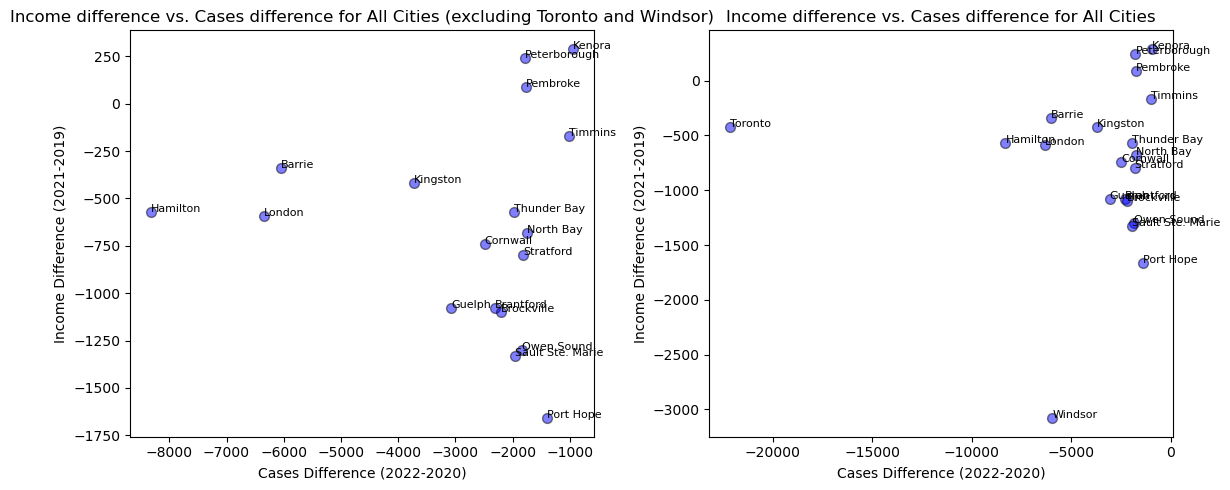

In [64]:
import numpy as np
merged_df = final_merged_df



x = merged_df['Cases_Difference_2022-2020']
y = merged_df['income_final_difference_2021-2019']
city_names = merged_df['City']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Filter the data for 'Toronto' and 'Windsor' in the first subplot
exclude_cities_data = merged_df[~merged_df['City'].isin(['Toronto', 'Windsor'])]
axs[0].scatter(exclude_cities_data['Cases_Difference_2022-2020'], exclude_cities_data['income_final_difference_2021-2019'], alpha=0.5, c='b', edgecolors='k', s=50)
axs[0].set_xlabel('Cases Difference (2022-2020)')
axs[0].set_ylabel('Income Difference (2021-2019)')
axs[0].set_title('Income difference vs. Cases difference for All Cities (excluding Toronto and Windsor)')

# Create the second subplot with all cities
axs[1].scatter(x, y, alpha=0.5, c='b', edgecolors='k', s=50)
axs[1].set_xlabel('Cases Difference (2022-2020)')
axs[1].set_ylabel('Income Difference (2021-2019)')
axs[1].set_title('Income difference vs. Cases difference for All Cities')

# Annotate data points in the first subplot
for i, city in enumerate(exclude_cities_data['City']):
    axs[0].annotate(city, (exclude_cities_data['Cases_Difference_2022-2020'].iloc[i], exclude_cities_data['income_final_difference_2021-2019'].iloc[i]), fontsize=8)

# Annotate data points in the second subplot
for i, city in enumerate(city_names):
    axs[1].annotate(city, (x[i], y[i]), fontsize=8)

# Adjust layout and display the plot
plt.tight_layout()


png_filename = "results/Income difference vs. Cases difference Between Male and Female.png"

# Save the plot as a PNG file
plt.savefig(png_filename)

plt.show()


In [65]:
import statsmodels.api as sm

# Handle missing data (impute or remove, depending on your data and needs)
final_merged_df = final_merged_df.dropna(subset=['income_final_difference_2021-2019', 'Cases_Difference_2022-2020'])

# Define your dependent variable (y) and independent variable (x)
y = final_merged_df['income_final_difference_2021-2019']
x = final_merged_df['Cases_Difference_2022-2020']

# Add a constant (intercept) to the independent variable
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Get the regression summary
summary = model.summary()
print(str(summary))


                                    OLS Regression Results                                   
Dep. Variable:     income_final_difference_2021-2019   R-squared:                       0.000
Model:                                           OLS   Adj. R-squared:                 -0.056
Method:                                Least Squares   F-statistic:                 8.210e-05
Date:                               Thu, 19 Oct 2023   Prob (F-statistic):              0.993
Time:                                       14:43:11   Log-Likelihood:                -160.39
No. Observations:                                 20   AIC:                             324.8
Df Residuals:                                     18   BIC:                             326.8
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                 coef    std err          t 

In [66]:

summary_dict = str(summary)

# Define the filename where you want to save the YAML file
yaml_filename = "results/regression_summary.yaml"

# Save the summary as a YAML file
with open(yaml_filename, "w") as yaml_file:
    yaml.dump(summary_dict, yaml_file, default_flow_style=False)

print(f"Regression summary saved as {yaml_filename}")

Regression summary saved as results/regression_summary.yaml


In [67]:
population_df = pd.read_csv('data/raw/population.csv')

In [68]:
population_df_2021 = population_df[population_df['Population and dwelling counts (7)'] == 'Population, 2021']
population_df_2021_small = population_df_2021[['GEO', 'VALUE']]

In [69]:
population_df_2021_small.columns = ['City', '2021Population']

In [70]:
population_df_2021_small.head(3)

,City,2021Population
0,Canada,36991981.0
7,Newfoundland and Labrador,510550.0
14,Bay Roberts,6897.0


In [71]:
final_merged_df_pop = final_merged_df.merge(population_df_2021_small, on='City', how='left')

In [72]:
final_merged_df_pop = final_merged_df_pop.sort_values(by='2021Population', ascending=False)
final_merged_df_pop = final_merged_df_pop.drop_duplicates(subset='City', keep='first')
final_merged_df_pop.head(3)

,City,Cases_Difference_2020,Cases_Difference_2022,Cases_Difference_2022-2020,income_difference_2019,income_difference_2021,income_final_difference_2021-2019,2021Population
18,Toronto,-1133.0,-23266.0,-22133.0,8230.0,7810.0,-420.0,5647656.0
5,Hamilton,-486.0,-8802.0,-8316.0,12120.0,11550.0,-570.0,729560.0
8,London,-194.0,-6543.0,-6349.0,9060.0,8470.0,-590.0,423369.0


In [73]:
y = final_merged_df_pop['income_final_difference_2021-2019']
x = final_merged_df_pop['Cases_Difference_2022-2020']
control_variable = final_merged_df_pop['2021Population']

# Add a constant term to the independent variable for the regression model
x = sm.add_constant(x)

# Step 3: Fit the regression model with control variable
model_with_control = sm.OLS(y, sm.add_constant(x.join(control_variable))).fit()
model_with_control_summary = model_with_control.summary()
print(model_with_control.summary())

                                    OLS Regression Results                                   
Dep. Variable:     income_final_difference_2021-2019   R-squared:                       0.074
Model:                                           OLS   Adj. R-squared:                 -0.035
Method:                                Least Squares   F-statistic:                    0.6760
Date:                               Thu, 19 Oct 2023   Prob (F-statistic):              0.522
Time:                                       14:43:11   Log-Likelihood:                -159.62
No. Observations:                                 20   AIC:                             325.2
Df Residuals:                                     17   BIC:                             328.2
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                                 coef    std err          t 

In [74]:
control_summary_dict = str(model_with_control_summary)

# Define the filename where you want to save the YAML file
yaml_filename = "results/regression_summary_controlpopulation.yaml"

# Save the summary as a YAML file
with open(yaml_filename, "w") as yaml_file:
    yaml.dump(summary_dict, yaml_file, default_flow_style=False)

print(f"Regression summary saved as {yaml_filename}")

Regression summary saved as results/regression_summary_controlpopulation.yaml
